# Markov Chains
## Markov processes
$$
X_t\in\mathbb R^n \text{ for example}
$$
$$
F(X_t | \{X_0,x_1,...,X_{t-1}\}) = F(X_{t} | X_{t-1})
$$

## The future will be like the past

$$
X_t = \beta E_t(Y_{t+1})
$$
$X$ may be be current economic activity, $Y$ may be future inflation

$$
Y_t = \gamma X_t + u_t
$$
Suppose that $(X_t,u_t)$ are Markov
$$
F(X_t, u_t|X_{t-1}, u_{t-1})
$$
then
$$
E_t(Y_{t+1}) = g(X_t, u_t)
$$
and
$$
X_t = \beta g(X_t, u_t).
$$
Hopefully,
$$
X_t = h(u_t).
$$


### Stochastic DEs are Markov processes
$$
x_t = Ax_{t-1} + B w_{t}
$$
$$
F(x_t | t-1) = 
F(Ax_{t-1} + B w_{t} | t-1) 
= F(Ax_{t-1} + B w_{t} | x_{t-1})
$$
## Markov chains
Suppose
$$
S_t \in 1, 2, 3, ..., N.
$$
For example, $s=1$ for employment and $s=2$ for unemployment.

$w_t \sim F()$ maybe even a density function $f(w_t)$

### Probability mass function (PMF)
$$
\pi_n \equiv
\Pr(S = n)
$$
$0 \le \pi_n \le 1$ and $\sum_{i=1}^N \pi_n = 1$.


In [61]:
using Random

Uniform distributed [0,1)

In [65]:
u = rand()

0.7508036602275083

In [97]:
pmf = [0.25, 0.5, 0.25]

3-element Array{Float64,1}:
 0.25
 0.5
 0.25

In [98]:
CDF = cumsum(pmf, dims=1)

3-element Array{Float64,1}:
 0.25
 0.75
 1.0

In [109]:
sum(rand() .>= CDF) + 1

1

In [102]:
u = rand()

0.1891952774570116

In [68]:
sum(pmf, dims=1)

1-element Array{Float64,1}:
 1.0

In [110]:
function draw_random_state(pmf::Vector{Float64})
    prob = pmf ./ sum(pmf, dims=1)
    CDF = cumsum(prob, dims=1)
    u = rand() # this is uniform random [0,1)
    return sum(u .>= CDF) + 1
end

draw_random_state (generic function with 1 method)

In [69]:
pmf = [1, 2, 3]
pmf ./ sum(pmf, dims=1)

3-element Array{Float64,1}:
 0.16666666666666666
 0.3333333333333333
 0.5

In [70]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [76]:
sum(A)

21

In [73]:
sum(A, dims=1)

1×3 Array{Int64,2}:
 5  7  9

In [75]:
sum(A, dims=(1,2))

1×1 Array{Int64,2}:
 21

In [83]:
A

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [81]:
b = [0 7; 0 8][:, 2:2]

2×1 Array{Int64,2}:
 7
 8

In [82]:
A .+ b

2×3 Array{Int64,2}:
  8   9  10
 12  13  14

In [84]:
c = [7;8]

2-element Array{Int64,1}:
 7
 8

In [85]:
A .+ c

2×3 Array{Int64,2}:
  8   9  10
 12  13  14

In [86]:
d = [0 7; 0 8]

2×2 Array{Int64,2}:
 0  7
 0  8

In [87]:
A .+ d

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 3 and 2")

In [91]:
maximum(A, dims=2)

2×1 Array{Int64,2}:
 3
 6

In [92]:
A .- maximum(A, dims=2)

2×3 Array{Int64,2}:
 -2  -1  0
 -2  -1  0

In [114]:
function test_randomizer(pmf::Vector{Float64})
    S = zeros(10000)
    for n = 1:length(S)
        S[n] = draw_random_state(pmf)
    end
    histogram(S)
end

test_randomizer (generic function with 1 method)

In [112]:
using Plots

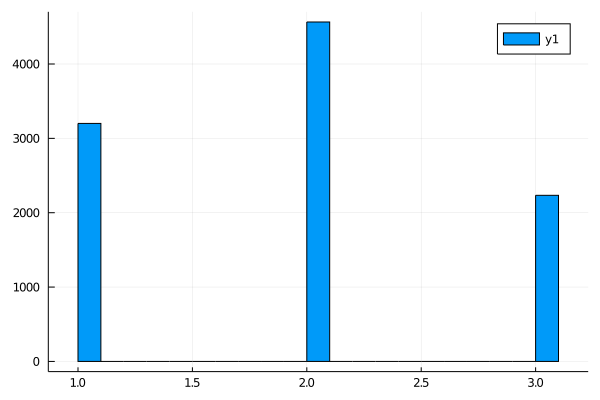

In [116]:
test_randomizer([0.35, 0.5, 0.25])

## Markov chains
If $S$ is Markovian,
$$
\Pr(S_t=n | t-1) =
\Pr(S_t=n | S_{t-1}=s) = P_{sn}
$$
$N^2$ (conditional) probabilities,
$$
0 \le P_{sn}\le 1
$$
$$
\sum_{n=1}^N P_{sn} = 1
\text{ for all }s
$$
**Transition matrix**:
$$
\mathbf P = 
\begin{bmatrix}
P_{11} & P_{12} & ...\\
P_{21} & P_{22} & ...\\
...
\end{bmatrix}
$$
$$
0 .\le \mathbf P .\le 1 \tag{*}
$$
$$
\mathbf P \mathbf 1 = \mathbf 1
\tag{**}
$$
(\*) and (\*\*) mean *stochastic matrix*.
$$
(\mathbf P - 1\mathbf I)\mathbf 1 = \mathbf 0
$$
$$
1 \in \text{eig}(\mathbf P)
$$
### Forecasting
Suppose we start in $s$
$$
\Pr(S_t=n | S_{t-1} = s) = P_{sn}
$$
$$
\pi_{t}(s) = 
\begin{pmatrix}
0 ... 1 ... 0
\end{pmatrix}
\mathbf P = 
\mathbf e_s
\mathbf P
$$

$$
\Pr(S_{t+1}=n|S_{t-1}=s) = 
$$
$$
\sum_{m=1}^N
\Pr(S_{t+1}=n| S_t = m)
\Pr(S_t =m | S_{t-1} = s)
$$
$$
\sum_{m=1}^N
P_{mn}P_{sm} = 
[\mathbf P
\mathbf P]_{sn}


In [129]:
P = [0.9 0.1; 0.4 0.6]

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

In [118]:
sum(P, dims=2)

2×1 Array{Float64,2}:
 1.0
 1.0

In [121]:
function simulate_markov_chain!(S::Vector{Int64}, P::Array{Float64, 2})
    T = length(S)
    for t = 2:T
        S[t] = draw_random_state(P[S[t-1], :])
    end
end

simulate_markov_chain! (generic function with 1 method)

In [120]:
P[1,:]

2-element Array{Float64,1}:
 0.9
 0.1

In [132]:
P

2×2 Array{Float64,2}:
 0.9  0.1
 0.4  0.6

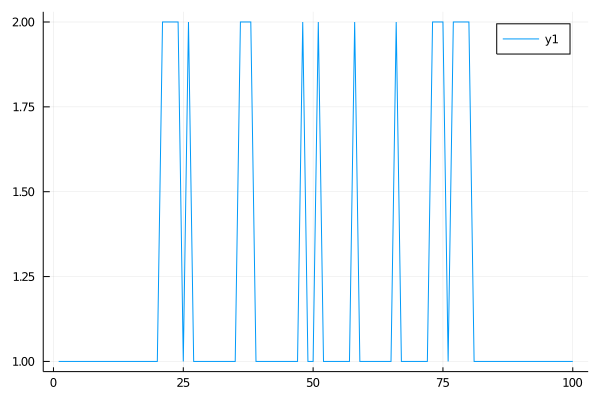

In [136]:
S = ones(Int64, 100) 
simulate_markov_chain!(S, P)
plot(S)